#Importing libraries

In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool
from google.colab import files





uploading the data

In [6]:
uploaded = files.upload()

Saving Cl102_RM.csv to Cl102_RM.csv


reading and cleaning data

In [8]:
data = pd.read_csv('Cl102_RM.csv')
del data["Unnamed: 0"]
del data["Index"]



#Selecting top 10 residues with highest degree values

In [9]:

data_Degree = data[["Residue","Degree"]]
data_top_10_highDegree = data_Degree.nlargest(10,["Degree"])
data_top_10_highDegree



,Residue,Degree
391,PARG400,24
200,PGLU209,21
144,PARG153,20
83,PARG92,18
203,PARG212,18
328,PHSD337,18
137,PGLU146,17
403,PTRP412,17
101,PMET110,16
163,PGLN172,16


#creating a panda dataframe for all sites

Creating array for all sites

In [ ]:
array1 = ['PARG93', 'PASN94','PARG223','PARG218','PGLU209']
array2 = ["PARG334","PARG333","PARG330","PGLU454","PTHR455"]
array3 = ["PARG153","PARG400","PLYS256","PMET142","PARG92","PGLN88","PGLU146","PARG212","PLYS213","TYR143"]
array4 = ["PSER248","PASN217","PARG253","PILE216"]
array5 = ["PGLU209","PARG223","PLYS230","PARG11"]

In [ ]:
site1 = data.loc[data["Residue"].isin(array1)]
site1

,Residue,Degree,Betweenness-centrality,Closeness-centrality
84,PARG93,13,0.042479,0.249438
85,PASN94,9,0.001674,0.227553
200,PGLU209,18,0.029540,0.244679
209,PARG218,8,0.003444,0.208225
214,PARG223,11,0.009048,0.210607


In [ ]:
site2 = data.loc[data["Residue"].isin(array2)]
site2

,Residue,Degree,Betweenness-centrality,Closeness-centrality
321,PARG330,7,0.001237,0.221283
324,PARG333,15,0.062220,0.258297
325,PARG334,14,0.037370,0.235785
445,PGLU454,5,0.003615,0.203604
446,PTHR455,8,0.000419,0.216248


In [ ]:
site3 = data.loc[data["Residue"].isin(array3)]
site3

,Residue,Degree,Betweenness-centrality,Closeness-centrality
83,PARG92,10,0.047940,0.275306
133,PMET142,11,0.019684,0.274287
137,PGLU146,15,0.063523,0.275213
144,PARG153,20,0.095185,0.278923
203,PARG212,19,0.035876,0.256500
247,PLYS256,4,0.012872,0.233594
391,PARG400,17,0.093301,0.287525


In [ ]:
site4 = data.loc[data["Residue"].isin(array4)]
site4

,Residue,Degree,Betweenness-centrality,Closeness-centrality
207,PILE216,12,0.002198,0.234435
208,PASN217,9,0.010855,0.235384
239,PSER248,10,0.001313,0.220705
244,PARG253,10,0.003044,0.247332


In [ ]:
site5 = data.loc[data["Residue"].isin(array5)]
site5

,Residue,Degree,Betweenness-centrality,Closeness-centrality
2,PARG11,9,0.009323,0.215805
200,PGLU209,16,0.029417,0.268099
214,PARG223,14,0.007649,0.220605
221,PLYS230,9,0.003425,0.202394


#Printing the top 10 residues with the highest BC

In [ ]:
#selecting the top 10 highest values in columb BC

data_BC = data[["Residue","Betweenness-centrality"]]
data_BC
data_top_10_highBC = data_BC.nlargest(10,["Betweenness-centrality"])
data_top_10_highBC



,Residue,Betweenness-centrality
117,PARG126,0.119769
137,PGLU146,0.101769
144,PARG153,0.099352
391,PARG400,0.090209
384,PGLU393,0.087517
324,PARG333,0.080933
371,PGLU380,0.071667
406,PASN415,0.066596
238,PGLU247,0.057463
403,PTRP412,0.055256


#Printing the top 10 residues with the highest CC

In [ ]:
data_CC = data[["Residue","Closeness-centrality"]]
data_top_10_highCC = data_CC.nlargest(10,["Closeness-centrality"])
data_top_10_highCC

,Residue,Closeness-centrality
17,PPHE26,0.297294
117,PARG126,0.295473
403,PTRP412,0.292356
379,PTRP388,0.289926
402,PASN411,0.289594
270,PGLN279,0.288314
124,PCYS133,0.285869
371,PGLU380,0.285724
155,PILE164,0.285691
273,PGLN282,0.285069


A function that return the top n residues with highest BC and CC values

In [14]:
#selecting the top 10 highest values in both column BC and CC
def top_n_highest_BC_AND_CC(data,n):
  top10_BC_AND_CC  = data.nlargest(n,["Betweenness-centrality","Closeness-centrality"])
  return top10_BC_AND_CC




In [15]:
top_n_highest_BC_AND_CC(data, 5)

,Residue,Degree,Betweenness-centrality,Closeness-centrality
83,PARG92,18,0.132241,0.313318
391,PARG400,24,0.123860,0.314492
245,PGLU254,15,0.119559,0.313935
384,PGLU393,13,0.111025,0.298395
324,PARG333,16,0.101093,0.295298


#Barplot of selected data

In [17]:
def plot_bar(data, graph_tile, image_title):
  data.reset_index().plot(x = "Residue",y = ["Betweenness-centrality","Closeness-centrality"],kind = "bar", figsize = (15, 10), rot = 0).get_figure()
  font = {'family' : 'normal','weight' : 'bold','size' : 14}
  plt.rc('font', **font)
  plt.title(graph_tile)
  plt.ylabel("valeurs")
  plt.savefig(image_title)






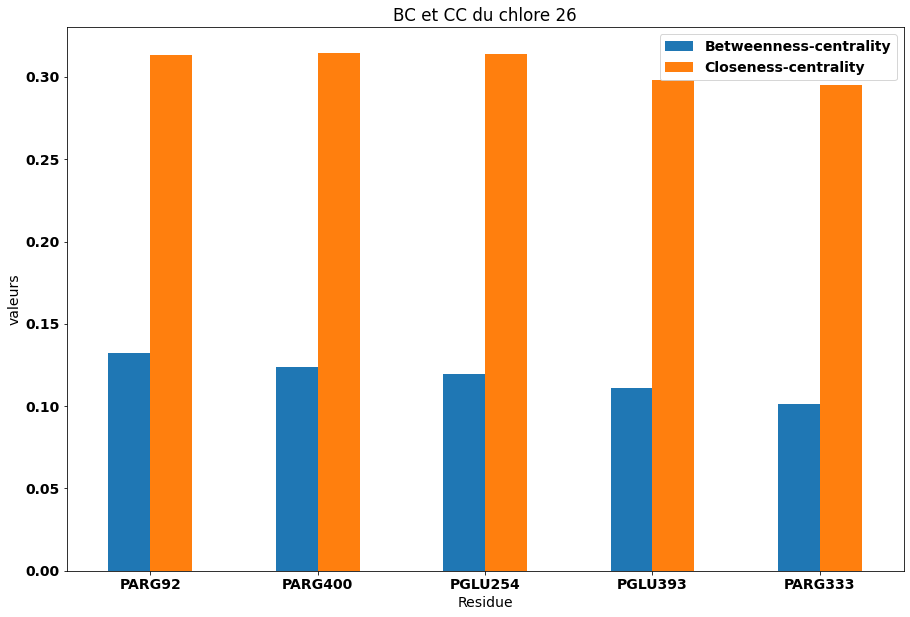

In [21]:
plot_bar(top_n_highest_BC_AND_CC(data,5),"BC et CC du chlore 26","site5_cl26.png")